In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-07 23:43:15--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-07 23:43:15 (9.38 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [12]:
# read in the data as a Data Frame
data_csv = pd.read_csv('moore.csv', header=None)
data_csv.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [13]:
# but we work with numpy arrays for regression problems
data = data_csv.values
print(data)

[[       1971        2300]
 [       1972        3500]
 [       1973        2500]
 [       1973        2500]
 [       1974        4100]
 [       1974        4500]
 [       1974        8000]
 [       1975        3510]
 [       1976        5000]
 [       1976        8500]
 [       1976        6500]
 [       1978        9000]
 [       1978       29000]
 [       1979       17500]
 [       1979       29000]
 [       1979       68000]
 [       1981       11500]
 [       1982       55000]
 [       1982      134000]
 [       1983       22000]
 [       1984       63000]
 [       1984      190000]
 [       1985      275000]
 [       1985       25000]
 [       1985       16000]
 [       1986      110000]
 [       1986      375000]
 [       1986       30000]
 [       1987      385000]
 [       1987      730000]
 [       1987      273000]
 [       1987      553000]
 [       1988      180000]
 [       1988      250000]
 [       1989      600000]
 [       1989     1000000]
 [       1989     1180235]
 

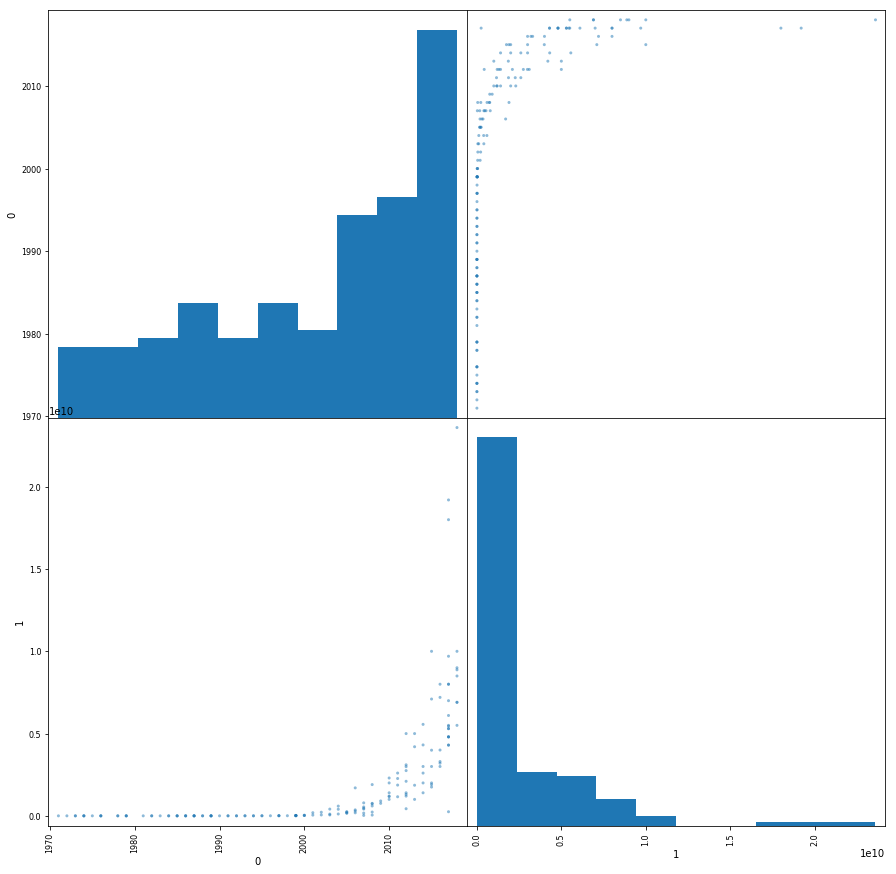

In [18]:
plt.rcParams['figure.figsize'] = [15, 15]
pd.plotting.scatter_matrix(data_csv);

In [57]:
# flatten the data -- vectorization
# reshape the data so that it is now a 2D-array NxD where D=1
X = data[:, 0].reshape(-1, 1) 

y = data[:, 1]

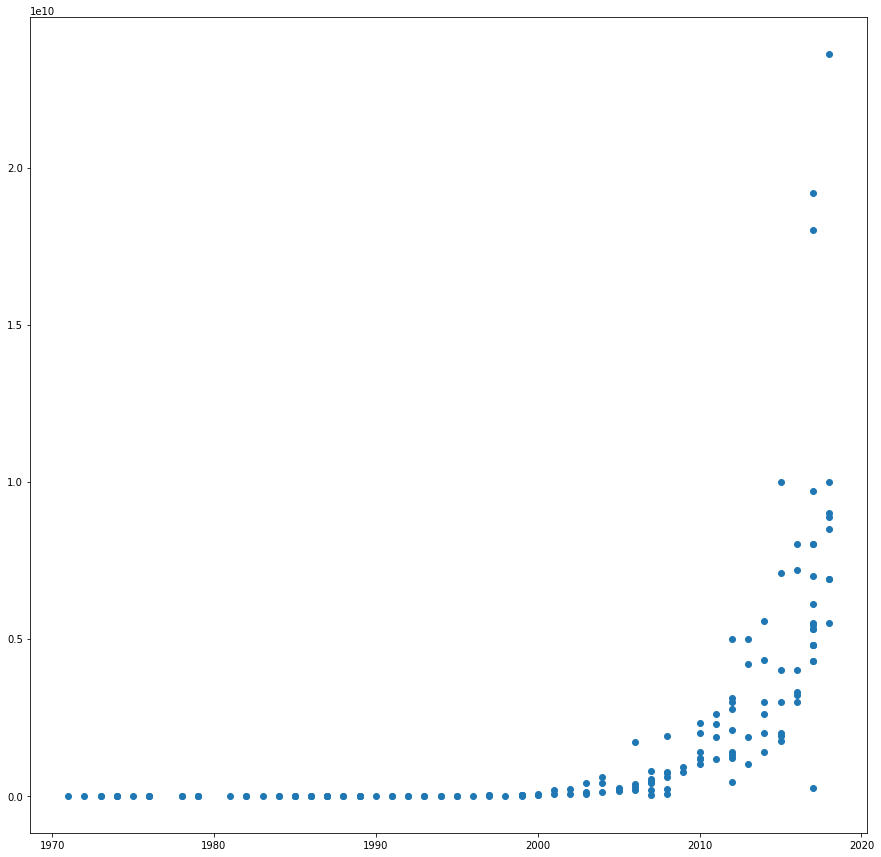

In [58]:
# How the number of CPUs on a device evolves as function of year
plt.scatter(X, y);

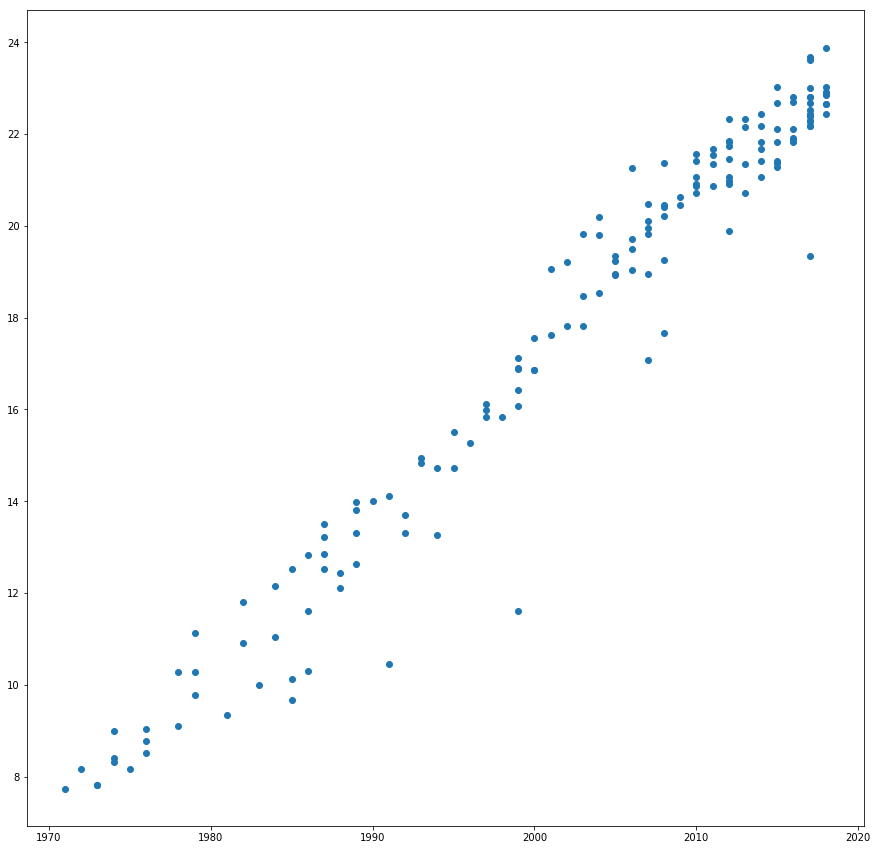

In [59]:
# to have a better feeling of the linear dependency
# we also plot the logarithmic relation
y_log = np.log(y)
plt.scatter(X, y_log);

In [70]:
# split the dataset
from sklearn.model_selection import train_test_split
X.flatten()
y.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42
                                                   )

In [81]:
np.shape(X_train)

(108, 1)

In [83]:
import tensorflow as tf

In [84]:
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.Input(shape=(1,)))
Model.add(tf.keras.layers.Dense(1, activation=None))

In [85]:
Model.compile(optimizer='SGD', loss='mse')

In [86]:
# how the fitting react to the fitting parameters
# after some epoch the learning rate will be reduced exponentially
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr*tf.math.exp(-0.1)
    
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
Model.fit(X_train, y_train, epochs=100, callbacks=[callback])

Train on 108 samples
Epoch 1/100
108/108 [==============================] - 0s 3ms/sample - loss: inf               
Epoch 2/100
108/108 [==============================] - 0s 124us/sample - loss: inf
Epoch 3/100
108/108 [==============================] - 0s 116us/sample - loss: nan
Epoch 4/100
108/108 [==============================] - 0s 202us/sample - loss: nan
Epoch 5/100
108/108 [==============================] - 0s 176us/sample - loss: nan
Epoch 6/100
108/108 [==============================] - 0s 102us/sample - loss: nan
Epoch 7/100
108/108 [==============================] - 0s 114us/sample - loss: nan
Epoch 8/100
108/108 [==============================] - 0s 165us/sample - loss: nan
Epoch 9/100
108/108 [==============================] - 0s 197us/sample - loss: nan
Epoch 10/100
108/108 [==============================] - 0s 217us/sample - loss: nan
Epoch 11/100
108/108 [==============================] - 0s 130us/sample - loss: nan
Epoch 12/100
108/108 [=============================

108/108 [==============================] - 0s 95us/sample - loss: nan
Epoch 99/100
108/108 [==============================] - 0s 159us/sample - loss: nan
Epoch 100/100
108/108 [==============================] - 0s 132us/sample - loss: nan


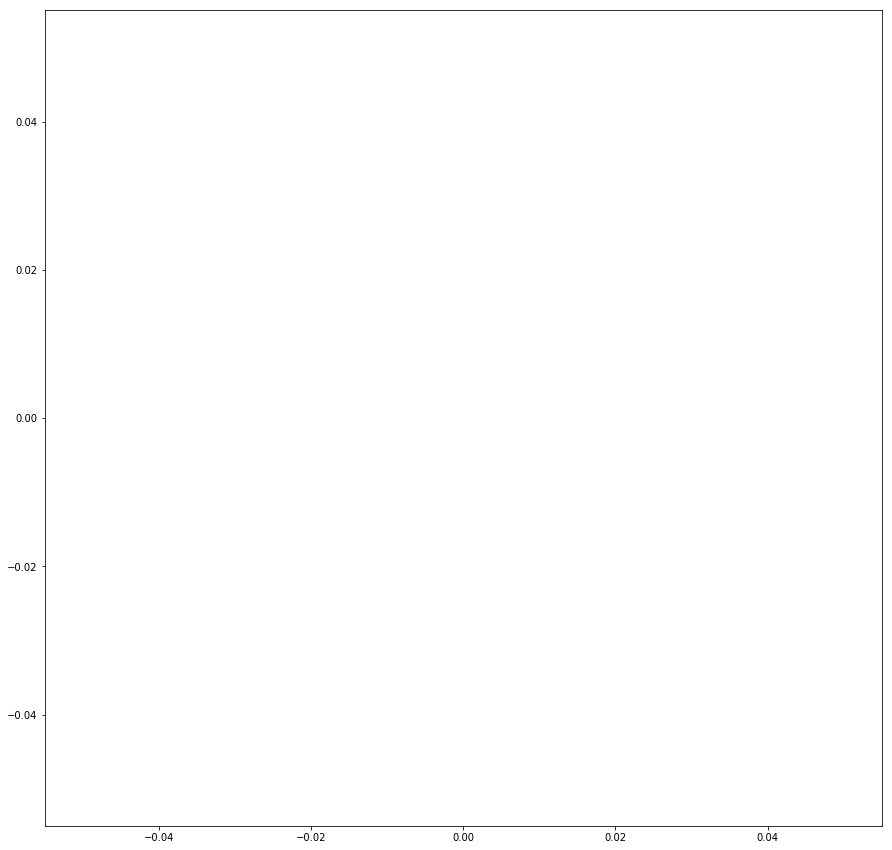

In [69]:
plt.plot(Model.history.history['loss']);